<h2> 6 Liear regression with pytorch </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# binding a toy dataset
x_train = np.arange(11, dtype = np.float32)

In [2]:
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [3]:
y_values = np.array([2 * i + 1 for i in x_train])

In [4]:
y_values.shape

(11, 1)

<h3> Building the model</h3>
<h4> Critical imports </h4>


In [18]:
import torch
import torch.nn as nn
from torch.autograd import Variable

x= Variable(torch.ones(2,2))

<b> Create Model </b>
<ul>
<li>1 Linear </li>
    <ul>
        <li> True equation y = 2x + 1
    </li></ul>
    

</ul>

In [6]:
# create a class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

In [8]:
# Training in the GPU
if torch.cuda.is_available():
    model.cuda()

In [9]:
# initialte the mean squared error loss
criterion = nn.MSELoss()

In [10]:
model.parameters

<bound method Module.parameters of LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>

In [11]:
# initialte optimizer class
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


In [12]:
# training the model
epochs = 100
error = 100
for epoch in range(epochs):

    epoch += 1
    # convert numpy array to torch variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_values))
    
    # clear gradient w.r.t values
    optimizer.zero_grad()
    
    # forward to get the output
    outputs = model(inputs)
    
    # Calculate the loss
    loss = criterion(outputs, labels)
    
    # Getting gradient w.r.t parameters
    loss.backward()
    
    # updating the parameters
    optimizer.step()
    
    if(error > loss):
        error = loss
    else:
        break
    
    print("Epoch : ", epoch, " loss : ", torch.mean(loss))

Epoch :  1  loss :  tensor(59.7156, grad_fn=<MeanBackward0>)
Epoch :  2  loss :  tensor(4.8710, grad_fn=<MeanBackward0>)
Epoch :  3  loss :  tensor(0.3975, grad_fn=<MeanBackward0>)
Epoch :  4  loss :  tensor(0.0327, grad_fn=<MeanBackward0>)
Epoch :  5  loss :  tensor(0.0029, grad_fn=<MeanBackward0>)
Epoch :  6  loss :  tensor(0.0005, grad_fn=<MeanBackward0>)
Epoch :  7  loss :  tensor(0.0003, grad_fn=<MeanBackward0>)
Epoch :  8  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  9  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  10  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  11  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  12  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  13  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  14  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  15  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  16  loss :  tensor(0.0002, grad_fn=<MeanBackward0>)
Epoch :  17  loss :  tensor(0.00

In [13]:
# purely ingerence
predicted = model(Variable(torch.from_numpy(x_train)))

In [14]:
# converting variable to tensor
predicted = predicted.data

# converting tensor to numpy array
predicted = predicted.numpy()

In [15]:
predicted

array([[ 1.0171396],
       [ 3.0146713],
       [ 5.0122027],
       [ 7.009734 ],
       [ 9.007266 ],
       [11.004798 ],
       [13.002329 ],
       [14.999861 ],
       [16.997393 ],
       [18.994925 ],
       [20.992456 ]], dtype=float32)

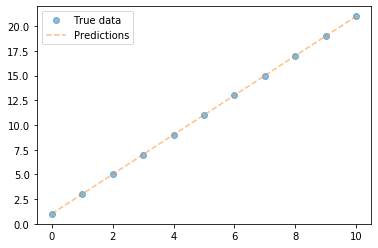

In [16]:
# clearing the figure
plt.clf()



# ploting the data
plt.plot(x_train, y_values,'o',label = 'True data', alpha = 0.5)

# ploting the predictions
plt.plot(x_train, predicted, '--', label = "Predictions", alpha = 0.5)


# ledgends and plots
plt.legend(loc = 'best')
plt.show()


<b> Saving the model</b>

In [17]:
save_model = False
if save_model:
    # saves only the parameter
    torch.save(model.state_dict(), 'linear_regression.pk1')


<b> load model </b>

In [101]:
load_model = False
if load_model:
    model.load_state_dict(torch.load('linear_regression.pk1'))